<a href="https://colab.research.google.com/github/saadrza/DA-Project2/blob/main/DA_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge

In [63]:
df = pd.read_csv('Customers.csv') #read csv
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [65]:
df = df.dropna()

In [66]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1965 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              1965 non-null   int64 
 1   Gender                  1965 non-null   object
 2   Age                     1965 non-null   int64 
 3   Annual Income ($)       1965 non-null   int64 
 4   Spending Score (1-100)  1965 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         1965 non-null   int64 
 7   Family Size             1965 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 138.2+ KB


,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000
mean,1000.309924,48.894656,110616.009669,51.078880,4.092621,3.757252
std,578.443714,28.414889,45833.860195,27.977176,3.926459,1.968335
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,498.000000,25.000000,74350.000000,28.000000,1.000000,2.000000
50%,1000.000000,48.000000,109759.000000,50.000000,3.000000,4.000000
75%,1502.000000,73.000000,149095.000000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


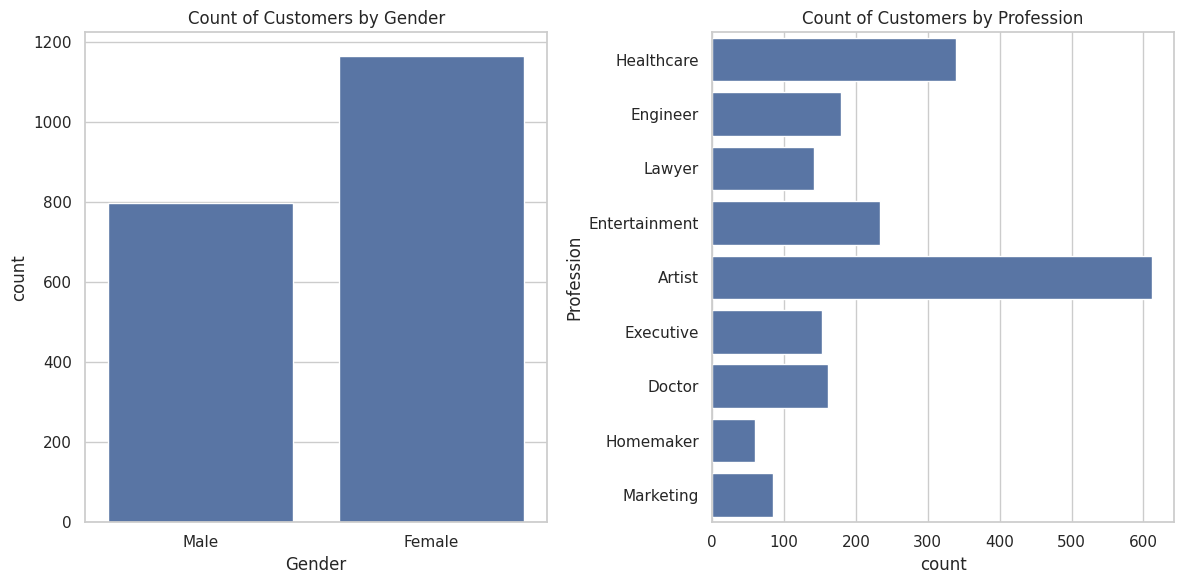

In [67]:
# Visualizing categorical features
plt.figure(figsize=(12, 6))


# Countplot for Gender
plt.subplot(1, 2, 1)
sns.countplot(x='Gender', data=df)
plt.title('Count of Customers by Gender')

# Countplot for Profession
plt.subplot(1, 2, 2)
sns.countplot(y='Profession', data=df)
plt.title('Count of Customers by Profession')

plt.tight_layout()
plt.show()

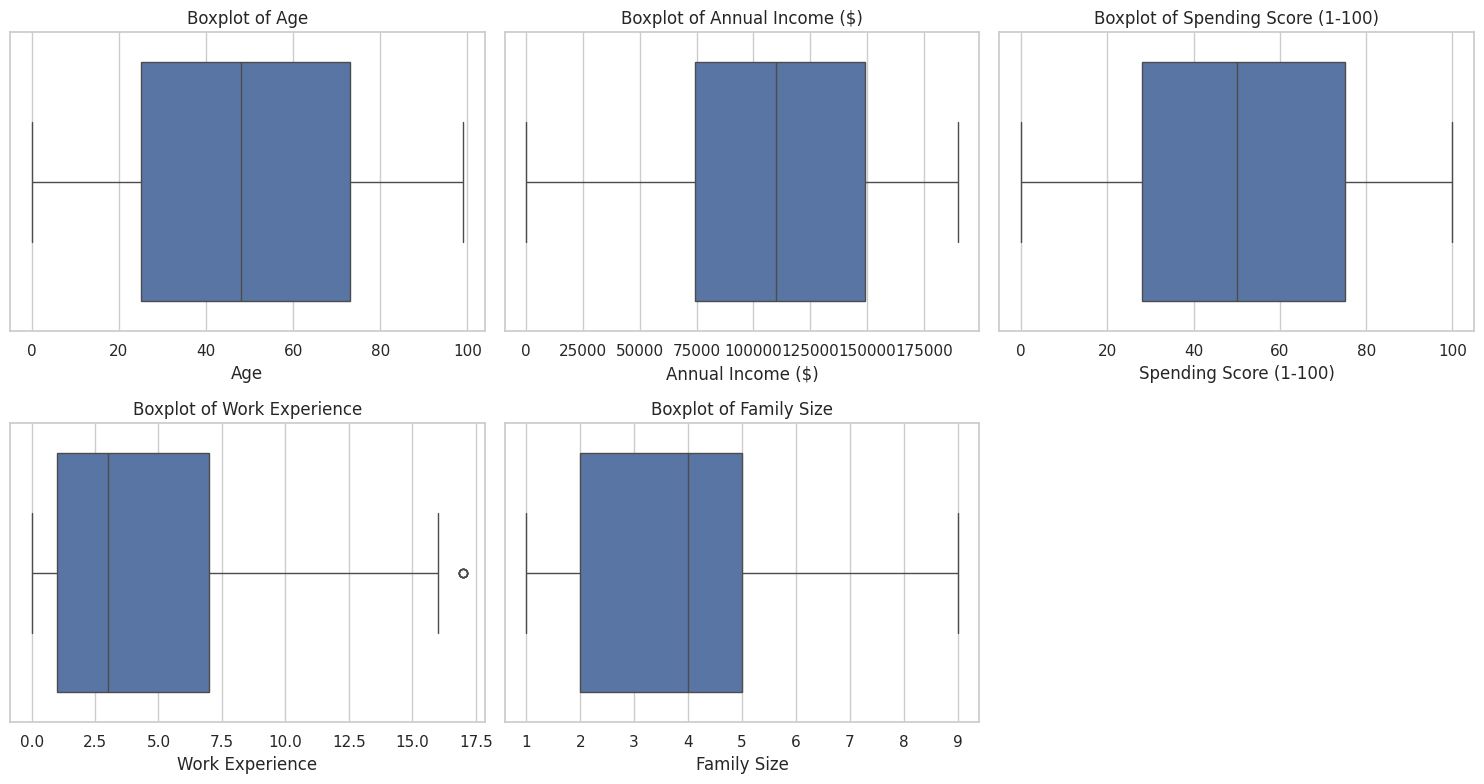

In [68]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size'], start=1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

## Data Cleaning for Age
The boxplot from above shows that the age starts from 0 and extends till 99. Our intution says that people with Age=0 should have zzero income. Let's see by locating data entries where age = 0.

In [69]:
df.loc[df['Age']==0].describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,23.000000,23.0,23.000000,23.000000,23.000000,23.000000
mean,1060.086957,0.0,117714.521739,57.260870,4.130435,3.956522
std,586.930685,0.0,42685.736640,30.039697,4.267257,2.163294
min,212.000000,0.0,22000.000000,7.000000,0.000000,1.000000
25%,561.500000,0.0,99974.500000,26.500000,1.000000,2.000000
50%,864.000000,0.0,121926.000000,63.000000,2.000000,4.000000
75%,1594.000000,0.0,143682.500000,83.500000,7.500000,6.000000
max,1980.000000,0.0,186002.000000,96.000000,15.000000,7.000000


The minimum age 0 have annual income ranging from 22000 to 186002. This is anomaly, probably a data entry error. So we will remove these data entries. Futhermore we will set the age range from 18 to 99.

In [70]:
df= df[df['Age']>=18]
df= df[df['Age']<=80]


In [71]:
df.loc[df['Age']==80]

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
209,210,Female,80,39000,33,Engineer,9,4
250,251,Male,80,20000,93,Engineer,1,3
413,414,Male,80,59099,44,Marketing,1,7
693,694,Female,80,171323,78,Lawyer,10,4
749,750,Male,80,127335,97,Artist,6,6
939,940,Female,80,67781,1,Entertainment,4,4
972,973,Female,80,177601,34,Entertainment,0,2
974,975,Male,80,95929,23,Engineer,0,2
1001,1002,Female,80,55712,5,Artist,5,6
1011,1012,Female,80,125623,62,Executive,0,4


In [72]:
distinct_profession = df['Profession'].unique()
distinct_profession

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing'], dtype=object)

In [73]:
df.loc[df['Work Experience']==0]

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
3,4,Female,23,59000,77,Lawyer,0,2
5,6,Female,22,58000,76,Artist,0,2
8,9,Male,64,97000,3,Engineer,0,3
12,13,Female,58,80000,15,Executive,0,5
14,15,Male,37,19000,13,Doctor,0,1
...,...,...,...,...,...,...,...,...
1882,1883,Male,68,51468,48,Artist,0,3
1887,1888,Female,77,124995,66,Healthcare,0,1
1893,1894,Female,68,173047,17,Healthcare,0,3
1894,1895,Female,39,61298,91,Artist,0,5


In [74]:
for idx, row in df.iterrows():
    if row['Age'] > 30 and row['Work Experience'] == 0:
        age_range = df[(df['Age'] >= row['Age'] - 5) & (df['Age'] <= row['Age'] + 5) & (df['Profession'] == row['Profession'])]
        if not age_range.empty:
            median_experience = age_range['Work Experience'].median()
            df.at[idx, 'Work Experience'] = median_experience


In [75]:
df.loc[df['Work Experience']==0]

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
3,4,Female,23,59000,77,Lawyer,0.0,2
5,6,Female,22,58000,76,Artist,0.0,2
41,42,Male,24,85000,92,Healthcare,0.0,2
48,49,Female,29,78000,42,Healthcare,0.0,4
65,66,Male,18,9000,59,Entertainment,0.0,2
...,...,...,...,...,...,...,...,...
1714,1715,Male,26,176147,19,Healthcare,0.0,1
1731,1732,Male,20,103195,68,Doctor,0.0,7
1865,1866,Male,24,51604,4,Artist,0.0,2
1874,1875,Male,18,162983,16,Entertainment,0.0,6


In [76]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1270 entries, 0 to 1998
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              1270 non-null   int64  
 1   Gender                  1270 non-null   object 
 2   Age                     1270 non-null   int64  
 3   Annual Income ($)       1270 non-null   int64  
 4   Spending Score (1-100)  1270 non-null   int64  
 5   Profession              1270 non-null   object 
 6   Work Experience         1270 non-null   float64
 7   Family Size             1270 non-null   int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 121.6+ KB


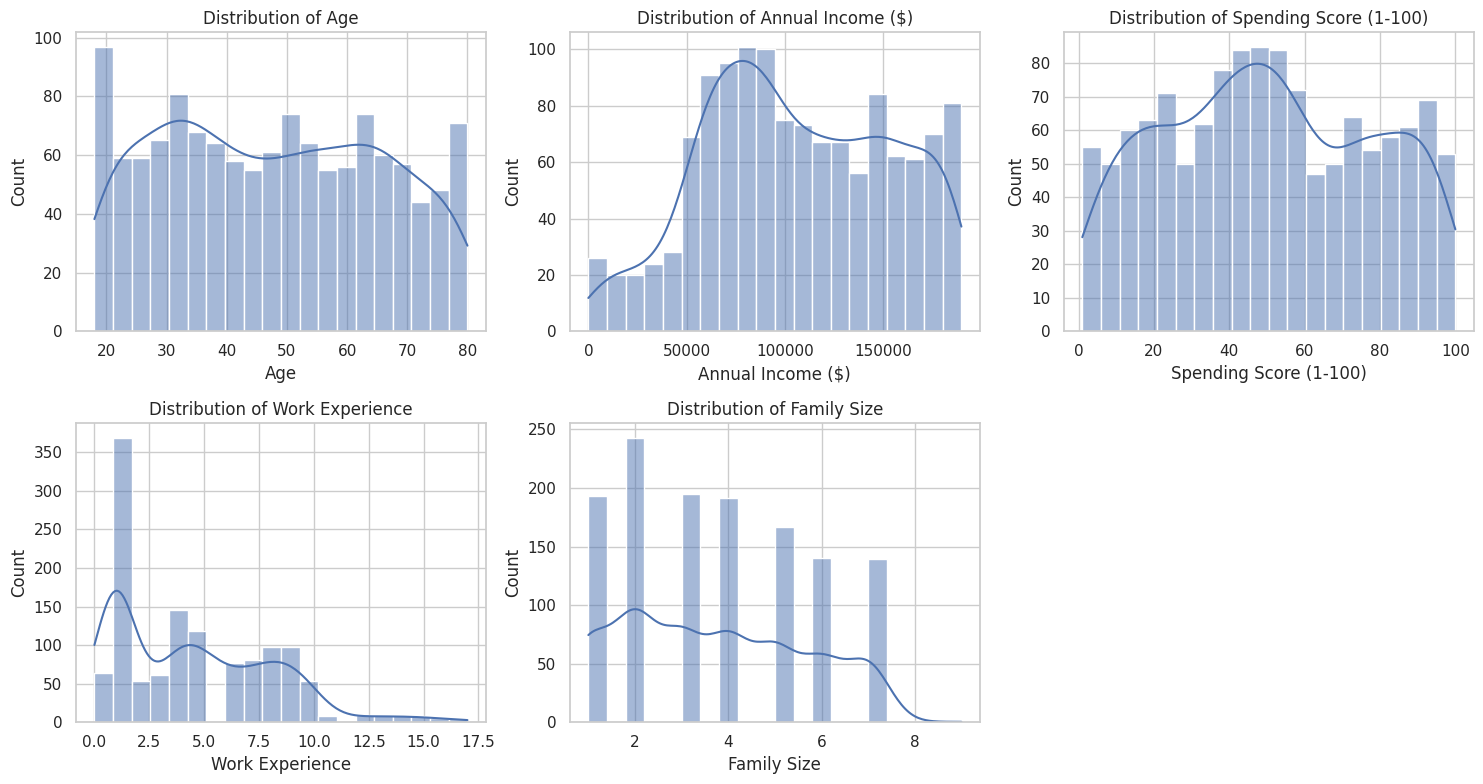

In [77]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Visualizing the distribution of numerical features
plt.figure(figsize=(15, 8))

# Histograms for numerical features
for i, col in enumerate(['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size'], start=1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

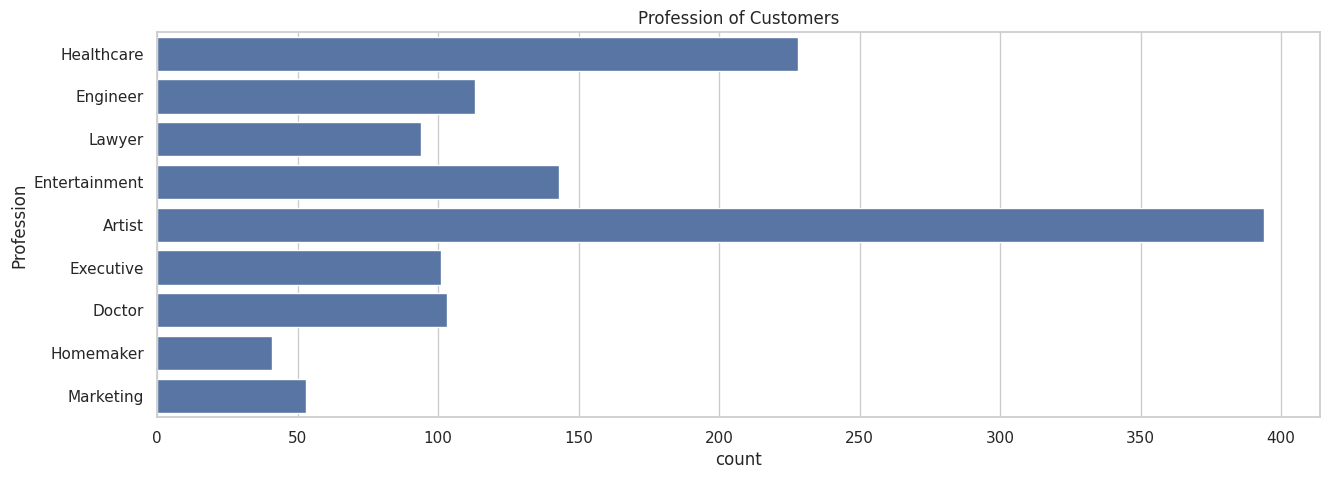

In [79]:
plt.figure(1,figsize=(15,5))
sns.countplot(y='Profession', data=df)
# data['Profession'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True, figsize=(5,5))
plt.title('Profession of Customers')
plt.show()

<Axes: xlabel='Profession', ylabel='count'>

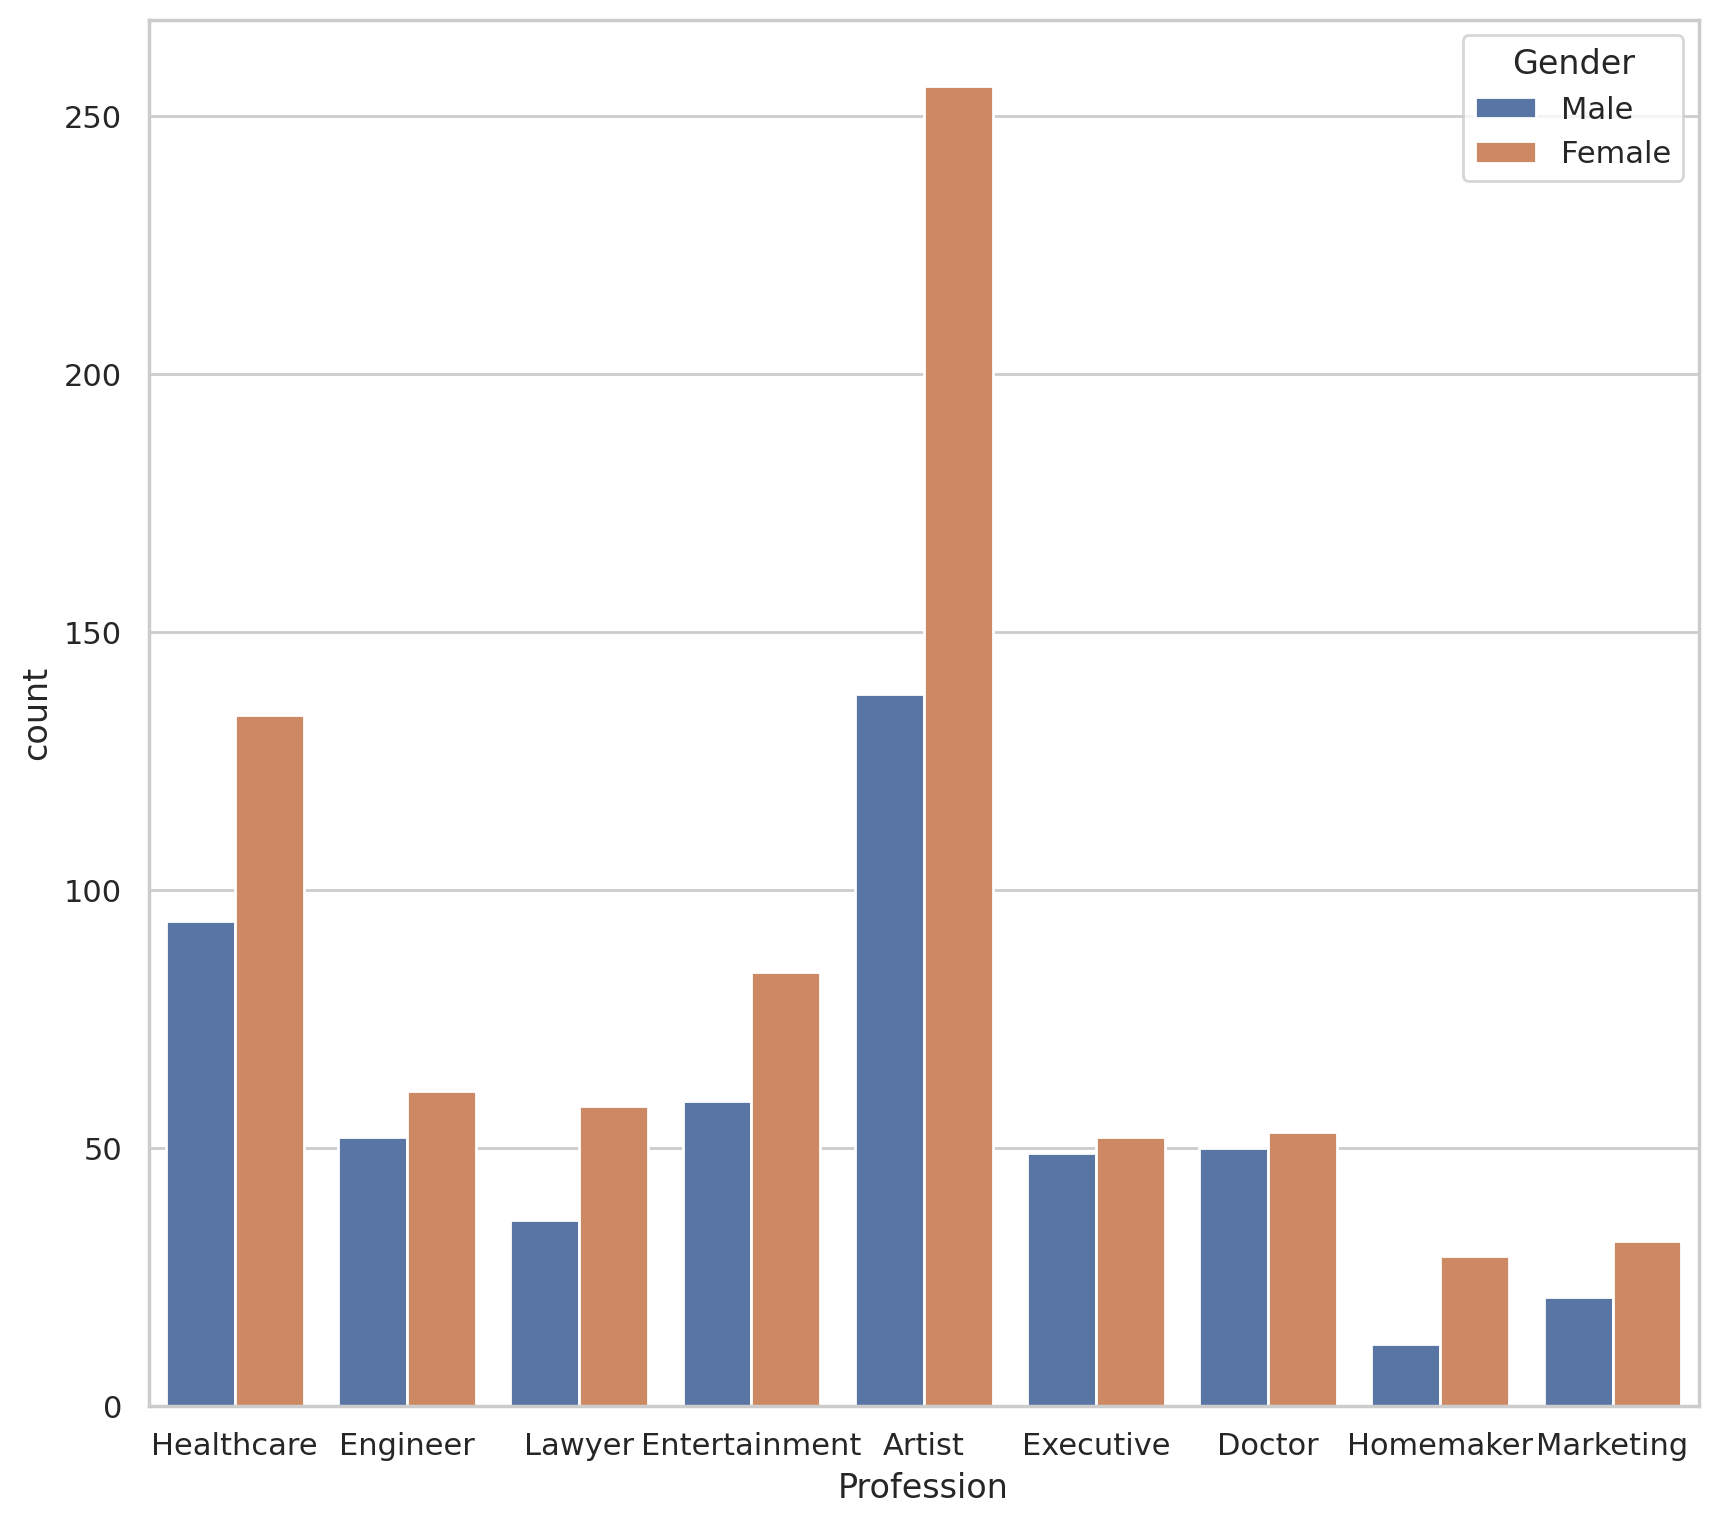

In [83]:
# Number of Male and Female Professions based on the field
plt.figure(figsize=(10,9),dpi=200)
sns.countplot(data = df,x="Profession",hue="Gender")

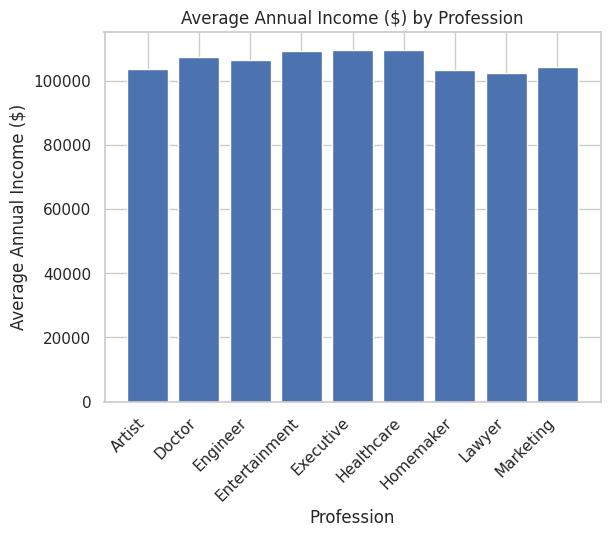

In [84]:
# Calculate average Annual Income ($) by age group
age_groups = df.groupby('Profession')['Annual Income ($)'].mean().reset_index()

# Create column chart
plt.bar(age_groups['Profession'], age_groups['Annual Income ($)'])
plt.title('Average Annual Income ($) by Profession')
plt.xlabel('Profession')
plt.ylabel('Average Annual Income ($)')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right')

plt.show()

In [53]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income ($)',
       'Spending Score (1-100)', 'Profession', 'Work Experience',
       'Family Size'],
      dtype='object')

Handling Categorical Data like Gender and Prefession by converting them to numerical values using encoding

In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
df_encoded= df.copy()
# Encode 'Gender' using LabelEncoder
label_encoder = LabelEncoder()
df_encoded['Gender'] = label_encoder.fit_transform(df['Gender'])

# Encode 'Profession' using LabelEncoder
# Note: Handle missing values in 'Profession' before encoding, if needed
df_encoded['Profession'] = label_encoder.fit_transform(df['Profession'].astype(str))

# Display the first few rows of the encoded DataFrame
print(df_encoded.head())

   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1       1   19              15000                      39   
1           2       1   21              35000                      81   
2           3       0   20              86000                       6   
3           4       0   23              59000                      77   
4           5       0   31              38000                      40   

   Profession  Work Experience  Family Size  
0           5              1.0            4  
1           2              3.0            3  
2           2              1.0            1  
3           7              0.0            2  
4           3              2.0            6  


In [56]:
df_corr = df_encoded.copy()
df_corr = df_encoded[[ 'Gender', 'Age', 'Annual Income ($)',
       'Spending Score (1-100)', 'Profession', 'Work Experience',
       'Family Size']]

<Axes: >

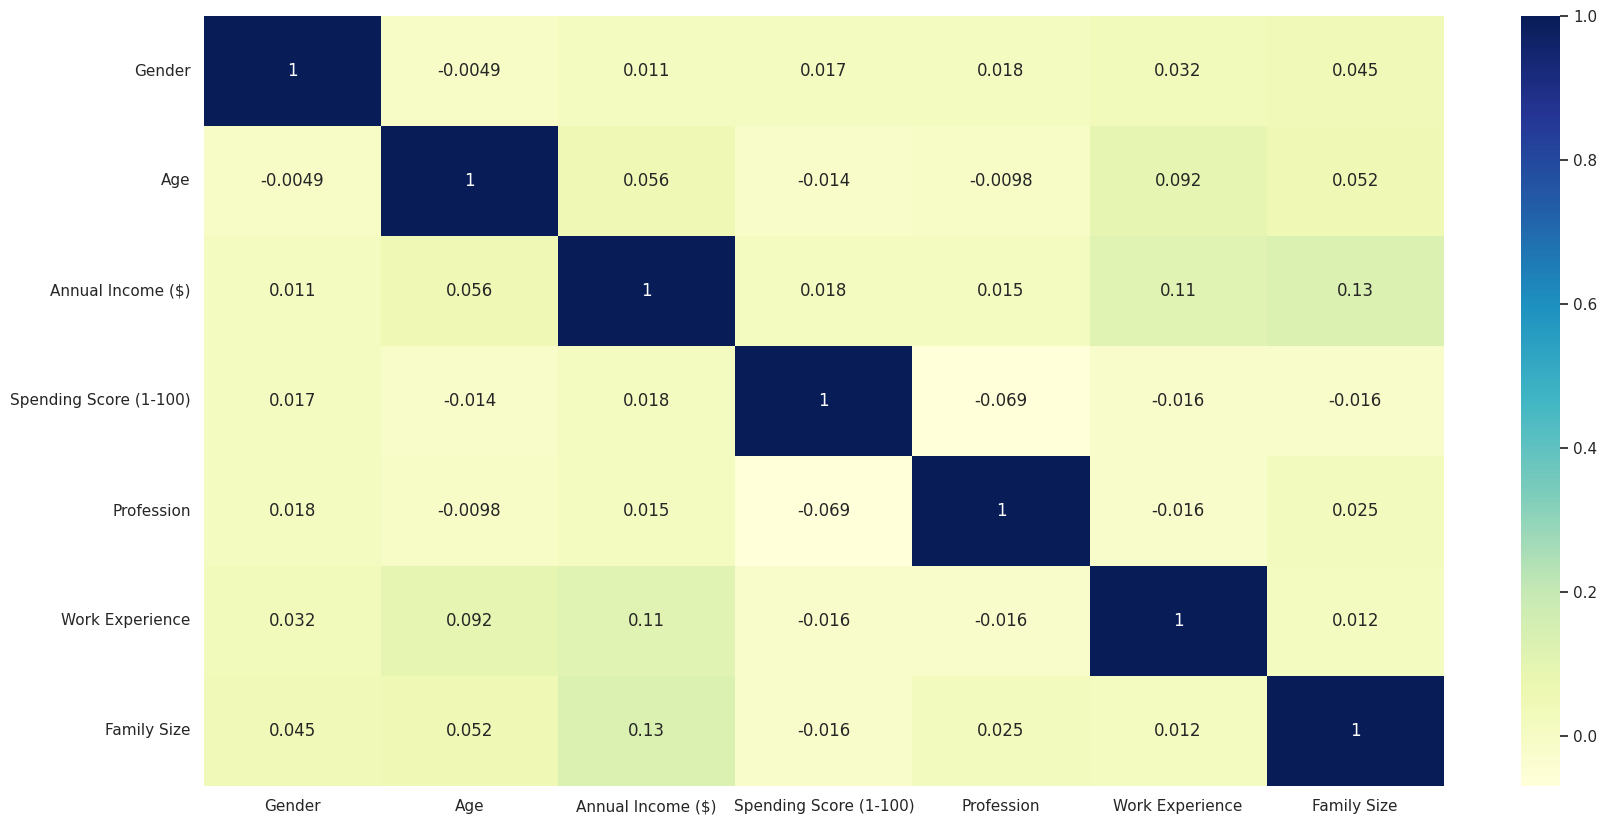

In [57]:
data =df_corr.corr()
plt.figure(figsize = (20,10))
sns.heatmap(data=df_corr.corr(), cmap="YlGnBu", annot=True)